Start with our usual setup, including the utility methods from last time.

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# provide methods for loading and displaying images
def load(image_path):
    out = io.imread(image_path)
    out = out.astype(np.float64) / 255
    return out

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# As usual, you may use your own images, but you must include them in your submission.
image_path = './dog.jpg'
image_path2 = './monkey.jpg'

image = load(image_path)
image2 = load(image_path2)

We provide a naive implementation of a grayscale convolutional filter:

In [2]:
import math
def naive_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
#     image = image.copy
    
    out = np.zeros(image.shape)
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            output_value = 0
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    if (image_row + image_row_offset < 0 or 
                        image_row + image_row_offset >= image.shape[0] or
                        image_column + image_column_offset < 0 or 
                        image_column + image_column_offset >= image.shape[1]):
                        image_value = 0
                    else:
                        image_value = image[image_row + image_row_offset, image_column + image_column_offset]

                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column] = output_value
            
    return out

## Exercise 1

1. Take a look at the filters in the following code cell. What do you think they do? You may want to run display() on the filter to visualize it.
2. Run the filters using `naive_convolution_filter` to verify your answer.

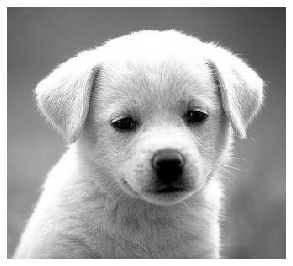

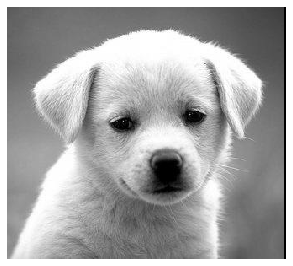

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


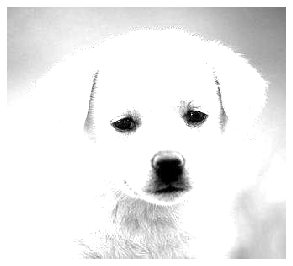

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


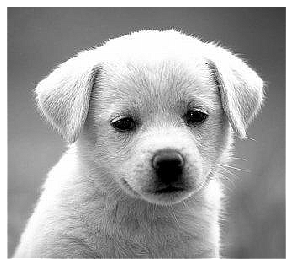

In [3]:
filter1 = np.array(
[
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

filter2 = np.array(
[
    [0,0,0],
    [0,2,0],
    [0,0,0]
])

# Hint: check the lecture slides for a familiar-looking filter
filter3 = np.array(
[
    [-.11,-.11,-.11],
    [-.11,1.88,-.11],
    [-.11,-.11,-.11],
])


output = naive_convolution_filter(image, filter1)
output2 = naive_convolution_filter(image, filter2)
output3 = naive_convolution_filter(image, filter3)
display(image)

display(output)
display(output2)
display(output3)



## Exercise 1 Answer
Filter1 shifts the image left by some amount.

Filter2 increases the brightness of the photo.

Filter3 sharpens the image.


## Exercise 2
So far, we've only run the naive implementation on a grayscale image. Add a color image of your choice and run a filter on it, showing both the original image and the output of the filter.

As you can see, the filter runs on all three channels. Create an implementation that allows applying different filters to each channel, and submit the output of using at least two different filters on the same image.

In [4]:
# def nc_filter_channel(img, channel, kernel):
    
#     imageChannelList = []
    
    
# #     img = [[[0,0,0],[0,1,0]],
# #            [[0,1,2],[1,2,3]],
    
#     if channel == "R":
#         for x in range(len(img)):
#             for y in range(len(img[x])):
#                 imageChannelList.append([img[x][y][0]])
        
                    
#     elif channel == "G":
#         for x in range(len(img)):
#             for y in range(len(img[x])):
#                     imageChannelList.append(img[x][y][1])
    
                    
#     elif channel == "B":
#         for x in range(len(img)):
#             for y in range(len(img[x])):
#                     imageChannelList[x].append(img[x][y][2])
                    
    
#     output = np.array(imageChannelList)
    
    
#     if kernel == "filter1":
#         moutputR = naive_convolution_filter(output, filter1)
        
#         for y in range(len(img)):
#             for x in range(len(img[y])):
#                 img[x][y] = moutputR[x][y]
                
#         return img
    
#     elif kernel == "filter2":
#         moutput2G = naive_convolution_filter(output, filter2)
        
#         return moutput2G
    
#     elif kernel == "filter3":
#         moutput3B = naive_convolution_filter(output, filter3)
        
#         return moutput3B



# test1 =  nc_filter_channel(image2, "R", "filter1")

# display(image2)

# display(test1)



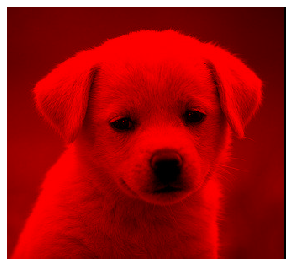

'\nMiles version of code written after I looked at it and tried to understand what it does. Important section \n\nfunctionNC (img, channel, kernel):\n\n    imgCopy = np.zeros(img.shape)\n    channelK= {"R":0, "G":1, "B":2}\n    \n    z = channelK[channel]\n    \n    imgCopy[:,:,z] = naive_convolution_filter(img[:,:,z], kernel)\n    \n    out = imgCopy\n    \n    return imgCopy\n\n'

In [5]:
#Got help from Peter, Riley, and Miles. No code of theirs was used in this snippit.
#The goal was to take the massive snippit of code above and condense it into a more efficient smaller piece of code.
#The above code doesn't work, the code below works.

def nc_filter_channel(img, channel, kernel):
    channelK= {"R":0, "G":1, "B":2}
    
    z = channelK[channel]
    
    imgCopy = np.zeros(img.shape) #maintain the correct data structure.
            
    for x in range(len(img)):
        for y in range(len(img[x])):
            imgCopy[x][y][z] = img[x][y][z]
    
    output = naive_convolution_filter(imgCopy, kernel)
    display(output)

nc_filter_channel(image, "R", filter1)


"""
Miles version of code written after I looked at it and tried to understand what it does. Important section 

functionNC (img, channel, kernel):

    imgCopy = np.zeros(img.shape)
    channelK= {"R":0, "G":1, "B":2}
    
    z = channelK[channel]
    
    imgCopy[:,:,z] = naive_convolution_filter(img[:,:,z], kernel)
    
    out = imgCopy
    
    return imgCopy

"""

## Exercise 3
Create your own filter(s) and describe their output.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


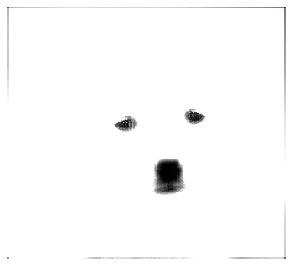

In [6]:
filter4 = np.array( #creates a flash bang, increases exposure. 
[
    [.12,.12,.12],
    [.12,1.89,.12],
    [.12,.12,.12],
])
# output4 = naive_convolution_filter(image, filter4)
# display(output4)

filter5 = np.array( #creates a bigger flash bang, increases exposure. 
[
    [2,4,.01,.001,.0001],
    [4,2,4,.01,.001],
    [.01,4,2,4,.01],
    [.001,.01,4,2,4],
    [.0001,.001,.01,4,2]
])

# output5 = naive_convolution_filter(image, filter5)
# display(output5)

filter6 = np.array(
[
    [1,0,0,0,1],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [1,0,0,0,1]
])

output6 = naive_convolution_filter(image, filter6)
display(output6)




## Advanced exercise 1

Recall from lecture that at the edges, filters only partially overlap with the image pixels, so we need a way to provide numbers that are out of bounds. The provided implementation uses the strategy we discussed in lecture, zero-padding, which just treats all out-of-bounds pixels as zero.

A different strategy is edge value replication: treat all out-of-bounds pixels as having the same value as the closest in-bounds pixel. 

Another one is mirror extension: treat the border of the image as a mirror, and use the pixel value that would be reflected into the out-of-bounds space. These are not the only strategies -- you're welcome to research others on your own.

Modify naive_convolutional_filter to implement one or more of these strategies. How does that change the output of filters?

In [10]:
#got help from miles for the logic stuff.

def NCF_EVR(img, kernel): #edge value replication
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
#     image = image.copy
    
    out = np.zeros(image.shape)
    
    for y in range(img.shape[0]): #y = height, x = wide
        for x in range(img.shape[1]):
            output_value = 0
            for kY in range(kernel.shape[0]):
                for kX in range(kernel.shape[1]):
                    x_offset = math.ceil(kY - kernel.shape[0] / 2)
                    y_offset = math.ceil(kX - kernel.shape[1] / 2)
                    
                    yn = 0
                    xn = 0
                    
                    
                    if (x + x_offset < 0):
                        xn = 0
                        
                    elif (x + x_offset >= img.shape[0]):
                        xn = img.shape[0] - 1
                        
                    elif (x + x_offset <= img.shape[0] and x + x_offset > 0):
                        xn = x + x_offset
                    
    #--------------------------------------------------------------------------------
    
                    if (y + y_offset < 0):
                        yn = 0
                        
                    elif (y + y_offset >= img.shape[1]):
                        yn = img.shape[1] - 1
                        
                    elif (y + y_offset <= img.shape[1] and y + y_offset > 0):
                        yn = y + y_offset
                        
                        
                        
                    image_value = image[yn][xn]

                    output_value += image_value * kernel[kY, kX]

            out[y, x] = output_value
            
    return out

imageh = load(image_path)
imageHOUT = NCF_EVR(imageh, filter1)
display(imageHOUT)


IndexError: index 300 is out of bounds for axis 0 with size 300

## Advanced exercise 2

You may have noticed that `naive_convolutional_filter` is quite slow. Create an implementation that is faster, using the `time` library to demonstrate the difference in performance. Your implementation must return the same output as the naive implementation.


In [8]:
import math
def NCF_SIMP(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
#     image = image.copy
    
    out = np.zeros(image.shape)
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            output_value = 0
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    if (image_row + image_row_offset < 0 or 
                        image_row + image_row_offset >= image.shape[0] or
                        image_column + image_column_offset < 0 or 
                        image_column + image_column_offset >= image.shape[1]):
                        image_value = 0
                    else:
                        image_value = image[image_row + image_row_offset, image_column + image_column_offset]

                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column] = output_value
            
    return out